Data Clean - Project BMW

In [60]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [61]:
df_bmw= pd.read_csv('/Users/ericaj/Desktop/GENERAL/ProyectosDs/Project_CleaningProcessing_BMW/bmw_pricing_v2OK.csv')

LIMPIEZA DE DATOS -->

In [62]:
df_bmw.shape

(4843, 18)

In [63]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [64]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [65]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [66]:
df_bmw[df_bmw.duplicated()] #No hay duplicados

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [67]:
#Empezamos a trabajar columna por columna, viendo lo nulos, errores, outliers, etc. 

In [68]:
df_bmw.isnull().any()

marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

In [69]:
df_bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [70]:
df_bmw['marca'].value_counts()

BMW    4841
Name: marca, dtype: int64

In [71]:
#Vemos que en marca solo tenemos un valor, que es 'BMWW. No es relevante, vamos a eliminar la columna.

In [72]:
del(df_bmw['marca'])

In [73]:
df_bmw['modelo'].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [74]:
df_bmw[df_bmw['modelo'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


In [75]:
df_bmw2= df_bmw.copy() #Realizamos un checkpoint

In [76]:
#En la columna 'modelo' tenemos tres valores nulos. Representa un 0,06% de los datos. No tenemos manera de saber que modelo es. Eliminamos estas tres filas.

In [77]:
#*ALTERNATIVA: Substituir los valores nulos por 'sin_modelo'.

In [78]:
df_bmw2.dropna(subset=['modelo'], inplace=True)

In [79]:
df_bmw2[df_bmw2['modelo'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [80]:
df_bmw2['km'].describe()

count    4.838000e+03
mean     1.409681e+05
std      6.022519e+04
min     -6.400000e+01
25%      1.028630e+05
50%      1.410845e+05
75%      1.752305e+05
max      1.000376e+06
Name: km, dtype: float64

In [81]:
#Vemos un mínimo con km negativo. Lo subsitituiremos por la media.
#Vemos un maximo máximo con 1.000.376km, es un valor en km complicado para un vehiculo.

In [82]:
df_bmw2[df_bmw2['km'].isnull()] #Los nulos en 'km' los podemos subsituir por la media de todos los kilometros.

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,estate,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,2013-11-01,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


<AxesSubplot:>

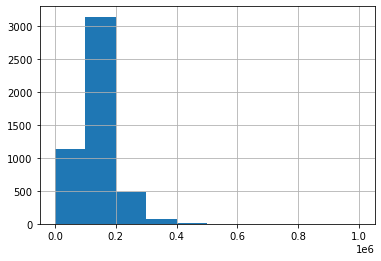

In [83]:
df_bmw2['km'].hist()

In [84]:
mean_km= df_bmw2[(df_bmw2['km']<0) | (df_bmw2['km']>500.000)]['km'].mean()
mean_km= int(mean_km)
mean_km
#En la media tendremos en cuenta los valores mínimos y máximos anomalos.

140997

In [85]:
#Substituimos el valor negativo por la media.
df_bmw2[df_bmw2['km']<0]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


In [86]:
df_bmw2['km']= np.where(df_bmw2['km']<0, mean_km, df_bmw2['km'])

In [88]:
df_bmw2[df_bmw2['km']>450000]
#Vemos dos coches con cercanos a los 500.000 km puede ser posible.
#Subsitituimos el valor de 1.000.000 km por la media.

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,False,False,False,True,False,8300.0,2018-03-01
2350,318,477571.0,85.0,2004-09-01,diesel,grey,hatchback,False,True,False,False,False,True,False,False,1200.0,2018-07-01
3732,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01


In [89]:
df_bmw2['km']= np.where(df_bmw2['km']>500000, mean_km, df_bmw2['km'])

In [91]:
#Substituimos los nulos por la media.
df_bmw2['km'].fillna(mean_km, inplace= True)

In [92]:
df_bmw2[df_bmw2['km'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [93]:
df_bmw2['km'].describe()

count      4840.000000
mean     140819.697314
std       58896.612662
min         476.000000
25%      102928.250000
50%      141065.500000
75%      175184.750000
max      484615.000000
Name: km, dtype: float64

<AxesSubplot:>

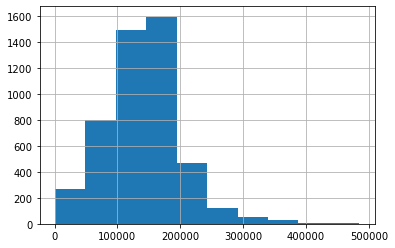

In [94]:
df_bmw2['km'].hist()

In [95]:
df_bmw2['potencia'].describe() 
#Vemos un minimo en 0. La potencia no puede ser 0... vamos a explorar esto.

count    4839.000000
mean      128.995660
std        39.002923
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [96]:
df_bmw2[(df_bmw2['potencia']>0) & (df_bmw2['potencia']<50)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01


In [112]:
#Para hacer la media cojeremos todos aquellos coches que su potencia sea superior a 25cv.
mean_potencia= df_bmw2[(df_bmw2['potencia']>25)]['potencia'].mean()
mean_potencia= round(mean_potencia,1)
mean_potencia

129.1

In [114]:
#Substituimos el minimo y los valores nulos por la media.
df_bmw2['potencia']= np.where(df_bmw2['potencia']<25, mean_potencia, df_bmw2['potencia'])
df_bmw2['potencia'].fillna(mean_potencia, inplace=True)

In [115]:
df_bmw2['potencia'].describe()

count    4840.000000
mean      129.022355
std        38.954771
min        25.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [116]:
df_bmw2['fecha_registro'].describe()

count           4839
unique           199
top       2013-07-01
freq             173
Name: fecha_registro, dtype: object

In [117]:
df_bmw2[df_bmw2['fecha_registro'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
198,318,158853.0,100.0,NaN,diesel,black,estate,True,False,False,False,False,False,True,False,10900.0,2018-06-01


In [118]:
#Al ser solo un registro el que es nulo, vamos a optar por eliminarlo.
#*ALTERNATIVA: Substituir los nulos por 'sin_fecha_de_registro'

In [119]:
df_bmw2.dropna(subset=['fecha_registro'], inplace=True)
df_bmw2[df_bmw2['fecha_registro'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [120]:
df_bmw3= df_bmw2.copy() #Realizamos un checkpoint

In [121]:
df_bmw3['tipo_gasolina'].describe()

count       4834
unique         5
top       diesel
freq        4627
Name: tipo_gasolina, dtype: object

In [122]:
df_bmw3['tipo_gasolina'].value_counts()

diesel           4627
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [124]:
#Observamos que es lo mismo 'diesel' que 'Diesel'
#Uniremos los dos valores.

In [125]:
df_bmw3[df_bmw3['tipo_gasolina'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01


In [126]:
#Viendo que en la mayoria de coches su tipo de gasolina es diesel (el 96% del total), substituiremos los nulos por tipo de gasolina diesel.

In [127]:
df_bmw3['tipo_gasolina'].fillna('diesel', inplace=True)
df_bmw3[df_bmw3['tipo_gasolina'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [128]:
#Uniremos los dos tipos de diesel. Diesel = diesel.
df_bmw3['tipo_gasolina']= np.where(df_bmw3['tipo_gasolina']=='Diesel', 'diesel', df_bmw3['tipo_gasolina'])
df_bmw3['tipo_gasolina'].value_counts()

diesel           4637
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

In [129]:
df_bmw3['color'].describe()

count      4827
unique       10
top       black
freq       1630
Name: color, dtype: object

In [130]:
df_bmw3['color'].value_counts()

black     1630
grey      1171
blue       707
white      536
brown      341
silver     326
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

In [131]:
df_bmw3[df_bmw3['color'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [132]:
#No queremos eliminar los registros de 'sin color', aunque tampoco podriamos asignarle un color exacto.
#Asignaremos a los nulos 'sin_color'.

In [133]:
df_bmw3['color'].fillna('sin_color', inplace=True)
df_bmw3[df_bmw3['color'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [134]:
df_bmw3['color'].value_counts()

black        1630
grey         1171
blue          707
white         536
brown         341
silver        326
red            51
beige          41
green          18
sin_color      12
orange          6
Name: color, dtype: int64

In [135]:
df_bmw3['tipo_coche'].describe()

count       4830
unique         8
top       estate
freq        1602
Name: tipo_coche, dtype: object

In [136]:
df_bmw3['tipo_coche'].value_counts()

estate         1602
sedan          1167
suv            1056
hatchback       699
subcompact      113
coupe           104
convertible      47
van              42
Name: tipo_coche, dtype: int64

In [137]:
df_bmw3[df_bmw3['tipo_coche'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
243,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01
424,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01
3621,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01
3632,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01
3634,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01
3654,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01
3716,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01
3747,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01
4842,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


In [138]:
#No sabemos que 'tipo_coche' asignar a los nulos, no tenemos un modelo predominante.
#Crearemos la categoria de 'sin_tipo_coche' y la asignamos a los nulos.

In [140]:
df_bmw3['tipo_coche'].fillna('sin_tipo_coche', inplace=True)
df_bmw3[df_bmw3['tipo_coche'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [141]:
df_bmw3['tipo_coche'].value_counts()

estate            1602
sedan             1167
suv               1056
hatchback          699
subcompact         113
coupe              104
convertible         47
van                 42
sin_tipo_coche       9
Name: tipo_coche, dtype: int64

In [142]:
df_bmw3['volante_regulable'].describe()

count     4835
unique       2
top       True
freq      2661
Name: volante_regulable, dtype: object

In [143]:
df_bmw3['volante_regulable'].value_counts()

True     2661
False    2174
Name: volante_regulable, dtype: int64

In [144]:
df_bmw3[df_bmw3['volante_regulable'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,2013-01-01,diesel,black,coupe,NaN,False,False,True,True,False,True,False,11900.0,2018-06-01
273,318,195032.0,100.0,2008-01-01,diesel,grey,estate,NaN,False,False,False,False,False,True,False,4900.0,2018-01-01
489,320,227691.0,135.0,2014-02-01,diesel,black,estate,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
614,318,201626.0,105.0,2013-10-01,diesel,black,estate,NaN,True,False,False,True,False,True,True,11700.0,2018-03-01


In [145]:
#Tenemos 4 valores nulos.
#El porcentaje entre volante regulable o no regulable es de aprox 50-50.
#Asignamos a los nulos 'sin_datos_volante_regulable'
df_bmw3['volante_regulable'].fillna('sin_datos_volante_regulable', inplace= True)

In [146]:
df_bmw3['volante_regulable'].value_counts()

True                           2661
False                          2174
sin_datos_volante_regulable       4
Name: volante_regulable, dtype: int64

In [147]:
df_bmw3.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             2
camara_trasera                 2
asientos_traseros_plegables    4
elevalunas_electrico           2
bluetooth                      4
gps                            0
alerta_lim_velocidad           2
precio                         6
fecha_venta                    1
dtype: int64

In [148]:
df_bmw3['aire_acondicionado'].describe()

count     4837
unique       2
top       True
freq      3835
Name: aire_acondicionado, dtype: object

In [149]:
df_bmw3['aire_acondicionado'].value_counts()

True     3835
False    1002
Name: aire_acondicionado, dtype: int64

In [150]:
df_bmw3[df_bmw3['aire_acondicionado'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
358,520,147891.0,135.0,2014-05-01,diesel,black,estate,False,NaN,False,True,True,False,True,True,17100.0,2018-02-01
373,320,176702.0,135.0,2014-10-01,diesel,white,estate,False,NaN,False,False,True,False,True,False,14500.0,2018-02-01


In [152]:
#Vemos que la mayoria de coches tenien aire acondicionado(cerca de un 80%).
#Vemos que la fecha de inscripcion de los dos nulos es en 2014.
#Entendemos que tiene aire acondicionado, substituimos los nulos por True.
df_bmw3['aire_acondicionado'].fillna(True, inplace=True)

In [153]:
df_bmw3[df_bmw3['aire_acondicionado'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [154]:
df_bmw3['aire_acondicionado'].value_counts()

True     3837
False    1002
Name: aire_acondicionado, dtype: int64

In [155]:
df_bmw4= df_bmw3.copy() #Realizamos un checkpoint.

In [156]:
df_bmw4['camara_trasera'].describe()

count      4837
unique        2
top       False
freq       3860
Name: camara_trasera, dtype: object

In [157]:
df_bmw4['camara_trasera'].value_counts()

False    3860
True      977
Name: camara_trasera, dtype: int64

In [158]:
df_bmw4[df_bmw4['camara_trasera'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
291,520,163675.0,135.0,2011-12-01,diesel,brown,estate,True,True,NaN,False,True,False,True,True,14900.0,2018-01-01
409,316,160619.0,85.0,2013-11-01,diesel,black,estate,False,True,NaN,False,True,False,True,False,11700.0,2018-04-01


In [160]:
#Vamos a buscar no eliminar los registros.
#Vemos que la mayoria de coches no tiene camara trasera, por tanto vamos a asumir que los dos nulos tampoco.
df_bmw4['camara_trasera'].fillna(False, inplace=True)

In [161]:
df_bmw4['camara_trasera'].value_counts()

False    3862
True      977
Name: camara_trasera, dtype: int64

In [162]:
df_bmw4['camara_trasera'].value_counts()

False    3862
True      977
Name: camara_trasera, dtype: int64

In [163]:
df_bmw4['asientos_traseros_plegables'].describe()

count      4835
unique        2
top       False
freq       3874
Name: asientos_traseros_plegables, dtype: object

In [164]:
df_bmw4['asientos_traseros_plegables'].value_counts()

False    3874
True      961
Name: asientos_traseros_plegables, dtype: int64

In [165]:
df_bmw4[df_bmw4['asientos_traseros_plegables'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
98,320,39228.0,135.0,2013-01-01,diesel,grey,coupe,False,False,False,NaN,True,False,True,True,14600.0,2018-04-01
132,320,224613.0,130.0,2009-03-01,diesel,white,coupe,False,False,False,NaN,True,False,True,False,8900.0,2018-07-01
387,520,109012.0,135.0,2013-01-01,diesel,black,estate,True,True,False,NaN,True,False,True,False,14300.0,2018-02-01
513,320,115498.0,135.0,2014-05-01,diesel,black,estate,False,False,False,NaN,False,False,False,True,17400.0,2018-02-01


In [166]:
#Optamos por substituir los valores nulos por 'sin_valores_asientos_traseros_plegables'
df_bmw4['asientos_traseros_plegables'].fillna('sin_datos_asientos_traseros_plegables', inplace= True)

In [167]:
df_bmw4['asientos_traseros_plegables'].value_counts()

False                                    3874
True                                      961
sin_datos_asientos_traseros_plegables       4
Name: asientos_traseros_plegables, dtype: int64

In [169]:
df_bmw4['elevalunas_electrico'].describe()

count      4837
unique        2
top       False
freq       2609
Name: elevalunas_electrico, dtype: object

In [170]:
df_bmw4['elevalunas_electrico'].value_counts()

False    2609
True     2228
Name: elevalunas_electrico, dtype: int64

In [171]:
#Vemos que en este caso es mas o menos un 50-50 de que el elevalunas sea electrico o no.
#Optamos por substituir los nulos por 'sin_datos_elevalunas_electrico'
df_bmw4['elevalunas_electrico'].fillna('sin_datos_elevalinas_electrico', inplace= True)

In [172]:
df_bmw4[df_bmw4['elevalunas_electrico'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [173]:
df_bmw4['elevalunas_electrico'].value_counts()

False                             2609
True                              2228
sin_datos_elevalinas_electrico       2
Name: elevalunas_electrico, dtype: int64

In [174]:
df_bmw5 = df_bmw4.copy() #Realizamos un checkpoint.

In [175]:
df_bmw5['bluetooth'].describe()

count      4835
unique        2
top       False
freq       3666
Name: bluetooth, dtype: object

In [176]:
df_bmw5['bluetooth'].value_counts()

False    3666
True     1169
Name: bluetooth, dtype: int64

In [179]:
#Son 4 valores nulos, no queremos eliminarlos, podria ser que fueran con bluetooth o no.
#Optamos por substituir los valores nulos por 'sin_datos_blutooth'.
df_bmw5['bluetooth'].fillna('sin_datos_butooth', inplace= True)

In [180]:
df_bmw5['bluetooth'].value_counts()

False                3666
True                 1169
sin_datos_butooth       4
Name: bluetooth, dtype: int64

In [181]:
df_bmw5['alerta_lim_velocidad'].describe()

count     4837
unique       2
top       True
freq      2617
Name: alerta_lim_velocidad, dtype: object

In [182]:
df_bmw5['alerta_lim_velocidad'].value_counts()

True     2617
False    2220
Name: alerta_lim_velocidad, dtype: int64

In [185]:
#Son 2 valores nulos, no queremos eliminarlos, podria ser que fueran con limite de velocidad o no.
#Optamos por substituir los valores nulos por 'sin_datos_alerta_lim_velocidad'
df_bmw5['alerta_lim_velocidad'].fillna('sin_datos_alerta_lim_velocidad', inplace=True)

In [186]:
df_bmw5['alerta_lim_velocidad'].value_counts()

True                              2617
False                             2220
sin_datos_alerta_lim_velocidad       2
Name: alerta_lim_velocidad, dtype: int64

In [188]:
df_bmw5['precio'].describe()

count      4833.000000
mean      15836.768053
std        9223.556891
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [189]:
df_bmw5['precio'].max()

178500.0

In [190]:
df_bmw5['precio'].min()

100.0

In [192]:
df_bmw5[df_bmw5['precio']<300.00]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
630,318,147558.0,105.0,2014-11-01,diesel,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01
879,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1832,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
2473,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2611,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2829,525,439060.0,105.0,1996-10-01,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,2018-03-01
4356,X3,79685.0,190.0,2014-02-01,diesel,black,suv,False,False,False,False,False,False,False,True,100.0,2018-05-01


In [196]:
df_bmw5[df_bmw5['precio']>100000.00]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01


In [193]:
#Vemos bastantes precios con valores bajos, aunque no sabemos si es anomalo o se debe a algun motivo que desconocemos.
#Lo mismo pasaria con los valores mas altos, no podemos determinar si es correcto o no.

In [191]:
#No tenemos la certeza de que el valor máximo y mínimo sean valores anomalos.
#Tenemos dos opciones:
#Dejarlos o substituirlos por la media (calculada sin el valor máximo y mínimo)
#Optamos por dejarlos.

In [197]:
df_bmw5[df_bmw5['precio'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,420,174740.0,135.0,2013-11-01,diesel,white,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,520,163803.0,135.0,2013-07-01,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,316,34489.0,85.0,2013-07-01,diesel,black,estate,True,False,False,False,False,False,True,False,NaN,2018-02-01
549,318,157129.0,100.0,2013-09-01,diesel,blue,estate,True,True,True,False,True,False,True,True,NaN,2018-03-01
569,320,166866.0,120.0,2014-05-01,diesel,blue,estate,True,True,False,False,True,True,True,True,NaN,2018-03-01
584,320,114771.0,135.0,2014-05-01,diesel,blue,estate,False,True,False,False,False,False,True,False,NaN,2018-03-01


In [200]:
mean_precio= df_bmw5['precio'].mean()
mean_precio= round(mean_precio,1)
mean_precio

15836.8

In [202]:
df_bmw5['precio'].fillna(mean_precio, inplace= True)
df_bmw5[df_bmw5['precio'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [203]:
df_bmw5[df_bmw5['fecha_venta'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
594,525,269290.0,120.0,2005-06-01,diesel,silver,estate,True,False,True,False,False,False,True,True,4200.0,NaN


In [206]:
#Al ser solo un registro y al no poder averiguar la fecha real, lo eliminaremos.
df_bmw5.dropna(subset=['fecha_venta'], inplace= True)
df_bmw5[df_bmw5['fecha_venta'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
